<center>
    <h1><b>Car Sales Prediction</b></h1>
</center>

**Table of Contents:**
    

  1.&nbsp;[Problem Statement and Background Information](#section1)<br>
         
  2.&nbsp;[Data Loading](#section2)<br>
       
  3.&nbsp;[Data Analysis and  pre-processing](#section3)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1&nbsp;[Missing Values](#section31)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2&nbsp;[Handling Categorical variable through Dummification](#section32)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3&nbsp;[IQR and Data Filtering](#section33)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4&nbsp;[Standardization of Sales](#section34)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.5&nbsp;[Train-Test Split](#section35)<br>
      
  4.&nbsp;[Data modeling](#section4)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1.1&nbsp;[Building Linear Regression Model](#section41)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1.2&nbsp;[Model Evaluation](#section42)<br>
      
      
      
  5.&nbsp;[Conclusions](#section5)<br>
  


<a id="section1"></a>
<h2><b>1. Problem Statement and Background Information</b></h2>

This is a cars dataset having 16 different variables. A linear regression model is created  using the provided predictor variables for the prediction of sales value of cars.



<a id="section2"></a>
<h2><b>2. Data Loading</b></h2>

In [1]:
import numpy as np

In [2]:
    
import pandas as pd
car = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/car_sales.csv")
car.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639


<a id="section3"></a>
<h2><b>3. Data Analysis and Pre-processing</b></h2>

### Shape of the dataset.

In [3]:
def data_shape():
    return car.shape 
data_shape()

(156, 16)

In [4]:
car.Sales_in_thousands.max()

540.561

In [5]:
boxplot1 = car.boxplot()
boxplot1

### Descriptive stats of the dataset.

In [6]:
def data_description():
    return car.describe()
data_description()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,151.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,52.051742,18.063571,27.401071,3.060897,185.948718,107.487179,71.150000,187.343590,3.380462,17.951923,23.833333,77.128857
std,68.907116,10.076941,14.305863,1.044653,56.700321,7.641303,3.451872,13.431754,0.629200,3.887921,4.256052,25.084045
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.630000,12.527500,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.567577
50%,27.609000,17.617500,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.160636
75%,65.905500,18.089731,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,89.623790
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


<a id="section31"></a>
<h2><b>3.1 Missing values</b></h2>

### Computing the percentage of missing values

In [7]:
def missing_values():
    columns=car.columns
    Column_Name,Total_values,Missing_count,Missing_percentage=list(),list(),list(),list()
    
    for col in columns:
        Column_Name.append(col)
        Total_values.append(car[col].count())
        Missing_count.append(car.shape[0]-car[col].count())
        percentage=(car.shape[0]-car[col].count())/car[col].count()*100
        Missing_percentage.append(percentage)
        
    
    data=list(zip(Column_Name,Total_values,Missing_count,Missing_percentage))
    miss=pd.DataFrame(data,columns={'Column','Total_Count','Missing_Count','Percentage_Missing'})
    return miss
missing_values()

,Total_Count,Missing_Count,Column,Percentage_Missing
0,Manufacturer,156,0,0.000000
1,Model,156,0,0.000000
2,Sales_in_thousands,151,5,3.311258
3,_year_resale_value,156,0,0.000000
4,Vehicle_type,156,0,0.000000
5,Price_in_thousands,156,0,0.000000
6,Engine_size,156,0,0.000000
7,Horsepower,156,0,0.000000
8,Wheelbase,156,0,0.000000
9,Width,156,0,0.000000


### Imputing the missing value using "median" groupby Manufacturer. 

In [8]:

def imputation():
    car.groupby('Manufacturer')["Sales_in_thousands"].transform("median")
    #transform method when used along with group by assigns the specified value to the group by
    # https://pbpython.com/pandas_transform.html
    car[car["Sales_in_thousands"].isnull()]
    car["Sales_in_thousands"].fillna(car.groupby("Manufacturer")["Sales_in_thousands"].transform("median"), inplace=True)
    return
imputation()
print (car.isnull().sum())


Manufacturer          0
Model                 0
Sales_in_thousands    0
_year_resale_value    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64


<a id="section32"></a>
<h2><b>3.2 Handling Cateogrical Variables through dummification</b></h2>

###  Dummy variable for "Vehicle_type"  and  drop the original variable.

In [9]:
car_dummy =pd.DataFrame()                                                           # Creating an empty data frame
def dummy_variables(car):
    # your code to create dummies
    dummies=pd.get_dummies(car,columns=["Vehicle_type"],drop_first=True)
    return dummies#your created variable
car_dummy = dummy_variables(car)
print(car_dummy)


    Manufacturer          Model  Sales_in_thousands  _year_resale_value  \
0          Acura        Integra              16.919           16.360000   
1          Acura             TL              39.384           19.875000   
2          Acura             CL              14.114           18.225000   
3          Acura             RL               8.588           29.725000   
4           Audi             A4              20.397           22.255000   
5           Audi             A6              18.780           23.555000   
6           Audi             A8               1.380           39.000000   
7            BMW           323i              19.747           18.072975   
8            BMW           328i               9.231           28.675000   
9            BMW           528i              17.527           36.125000   
10         Buick        Century              91.561           12.475000   
11         Buick          Regal              39.350           13.740000   
12         Buick    Park 

###  Droping the below mentioned variables which will not help in prediction of sales.
``` ['Manufacturer', 'Model', 'Latest_Launch'] ```

In [10]:
def column_drop(car_dummy):
    # your code to drop the useless variables
    dummies1=car_dummy.drop(['Manufacturer', 'Model', 'Latest_Launch'],axis=1)
    return dummies1# your created variable
car_dummy = column_drop(car_dummy)
print (car_dummy)

     Sales_in_thousands  _year_resale_value  Price_in_thousands  Engine_size  \
0                16.919           16.360000              21.500          1.8   
1                39.384           19.875000              28.400          3.2   
2                14.114           18.225000              29.000          3.2   
3                 8.588           29.725000              42.000          3.5   
4                20.397           22.255000              23.990          1.8   
5                18.780           23.555000              33.950          2.8   
6                 1.380           39.000000              62.000          4.2   
7                19.747           18.072975              26.990          2.5   
8                 9.231           28.675000              33.400          2.8   
9                17.527           36.125000              38.900          2.8   
10               91.561           12.475000              21.975          3.1   
11               39.350           13.740

### Outliers check using Box Plot

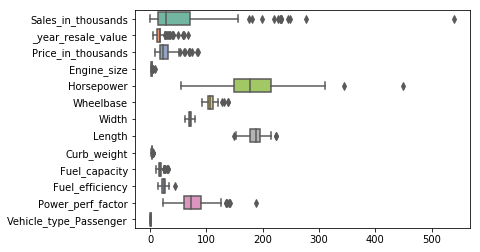

In [11]:
def box_plot():
    import seaborn as sns
    sns.boxplot(data=car_dummy, orient="h", palette="Set2")
    return None 
box_plot()

In [12]:
car_dummy

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,16.919,16.360000,21.500,1.8,140,101.2,67.3,172.4,2.639,13.2,28,58.280150,1
1,39.384,19.875000,28.400,3.2,225,108.1,70.3,192.9,3.517,17.2,25,91.370778,1
2,14.114,18.225000,29.000,3.2,225,106.9,70.6,192.0,3.470,17.2,26,90.345000,1
3,8.588,29.725000,42.000,3.5,210,114.6,71.4,196.6,3.850,18.0,22,91.389779,1
4,20.397,22.255000,23.990,1.8,150,102.6,68.2,178.0,2.998,16.4,27,62.777639,1
5,18.780,23.555000,33.950,2.8,200,108.7,76.1,192.0,3.561,18.5,22,84.565105,1
6,1.380,39.000000,62.000,4.2,310,113.0,74.0,198.2,3.902,23.7,21,134.656858,1
7,19.747,18.072975,26.990,2.5,170,107.3,68.4,176.0,3.179,16.6,26,71.191207,1
8,9.231,28.675000,33.400,2.8,193,107.3,68.5,176.0,3.197,16.6,24,81.877069,1
9,17.527,36.125000,38.900,2.8,193,111.4,70.9,188.0,3.472,18.5,25,83.998724,1


<a id="section33"></a>
<h2><b>3.3 IQR and data filtering</b></h2>

### Calculating the Inter quantile range and then droping off outliers for quantile values outside 5 to 95 range.

In [13]:
def dropping_outliers(car_dummy):
    import pandas as pd
    Q1=car_dummy.quantile(0.05)
    Q3=car_dummy.quantile(0.95)
    Q_diff=Q3-Q1
    outliers_removed=car_dummy[~((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)]
    print(car_dummy[((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)])
    return outliers_removed
car_dummy = dropping_outliers(car_dummy)
print (car_dummy)

    Sales_in_thousands  _year_resale_value  Price_in_thousands  Engine_size  \
38               0.916              58.470              69.725          8.0   
55             540.561              15.075              26.935          4.6   

    Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  \
38         450       96.2   75.7   176.7        3.375           19.0   
55         220      138.5   79.1   224.5        4.241           25.1   

    Fuel_efficiency  Power_perf_factor  Vehicle_type_Passenger  
38               16         188.144323                       1  
55               18          89.401935                       0  
     Sales_in_thousands  _year_resale_value  Price_in_thousands  Engine_size  \
0                16.919           16.360000              21.500          1.8   
1                39.384           19.875000              28.400          3.2   
2                14.114           18.225000              29.000          3.2   
3                 8.588       

<a id="section34"></a>
<h2><b>3.4 Standardizing Sales_in_thousands</b></h2>

### Code to standardize the variable for model building (return value will be numpy.ndarray).

In [14]:
std = pd.DataFrame()
print(car_dummy.columns)
car_modify = car_dummy.drop(car_dummy[['Sales_in_thousands']], axis=1)
def data_standardization(car_modify):
    from sklearn.preprocessing import StandardScaler
    scalar=StandardScaler().fit(car_modify)
    std_mat=scalar.transform(car_modify)
    return std_mat # your created variable
std = data_standardization(car_modify)
print(std.shape)

Index(['Sales_in_thousands', '_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Vehicle_type_Passenger'],
      dtype='object')
(154, 12)


### Code to create a DataFrame from the standardized value calculated above

### Since the standardized value is a numpy array, add the data to a dataframe with column header as mentioned below in the same order

```['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger'] ```

In [15]:
columns = ['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger']
def std_df(std):
    # create a dataframe cars for the numpy array
    # assign the column headers with the columns mentioned above
    cars=pd.DataFrame(std)
    cars.columns=columns
    return cars
cars = std_df(std)

### Since all variable may not be of use, extracting only the following variables for training. Preparing X (independent features) for the model building.

```['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']```

In [16]:
X = pd.DataFrame()
feature_cols = ['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']                
def feature_selection(cars):
    # assign values of fature_cols to X
    X=cars[feature_cols]
    return X
X = feature_selection(cars)
print(X)

     Price_in_thousands  Engine_size  Wheelbase  Fuel_efficiency  \
0             -0.403867    -1.268771  -0.856756         0.971917   
1              0.091168     0.188592   0.103064         0.256908   
2              0.134214     0.188592  -0.063862         0.495244   
3              1.066888     0.500884   1.007242        -0.458101   
4             -0.225224    -1.268771  -0.662010         0.733581   
5              0.489348    -0.227798   0.186526        -0.458101   
6              2.501772     1.229566   0.784675        -0.696438   
7             -0.009992    -0.540090  -0.008220         0.495244   
8              0.449889    -0.227798  -0.008220         0.018572   
9              0.844481    -0.227798   0.562108         0.256908   
10            -0.369789     0.084495   0.228258         0.256908   
11            -0.131239     0.813176   0.228258        -0.219765   
12             0.346936     0.813176   0.895958         0.018572   
13             0.054219     0.813176   0.673391 

<a id="section35"></a>
<h2><b>3.5 Train-Test Split</b></h2>

### Check for the type and shape of X.

In [17]:
def check_x():
    print(type(X))
    print(X.shape)
check_x()

<class 'pandas.core.frame.DataFrame'>
(154, 5)


### Extract y (dependent variable) for model building.
```['Sales_in_thousands']```

In [18]:
y = pd.DataFrame()
def targetVariable_selection(car_dummy):
    # assign the dependent variable to y dataframe
    target=car_dummy['Sales_in_thousands']
    
    return target#your dataframe
y = targetVariable_selection(car_dummy)
print(y.head())

0    16.919
1    39.384
2    14.114
3     8.588
4    20.397
Name: Sales_in_thousands, dtype: float64


### Check for the type and shape of y. 

In [19]:
def check_y():
    print(type(y))
    print(y.shape)
check_y()

<class 'pandas.core.series.Series'>
(154,)


<a id=section403></a>

### Spliting the value of X and y into train and test datasets.

In [20]:
pip install cross_validation


The following command must be run outside of the IPython shell:

    $ pip install cross_validation

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [21]:
from sklearn.model_selection import train_test_split
def data_split():
  return train_test_split(X, y, test_size=0.30, random_state=1) # train test split using train test split of 70:30 and random state=1
X_train, X_test, y_train, y_test = data_split()

### Check the shape of  X and y of train dataset.

In [22]:
def check_train():
    print(X_train.shape)
    print(y_train.shape)
check_train()

(107, 5)
(107,)


### Check the shape of X and y of test dataset.

In [23]:
def check_test():
    print(X_test.shape)
    print(y_test.shape)
check_test()

(47, 5)
(47,)


<a id=section404></a>

<a id="section4"></a>
<h2><b>4. Data Modeling</b></h2>

<a id="section41"></a>
<h2><b>4.1 Building Linear Regression Model</b></h2>

### Instantiating Linear regression model using scikit-learn

In [24]:
from sklearn.linear_model import LinearRegression
def linear_regression():
    #initiate the linear regression model to new variable linreg
    linreg = LinearRegression()
    return linreg
linreg = linear_regression()

### Fitting the linear model on X_train and y_train.

In [25]:
  y_train.isnull().values.any()

False

In [26]:
def fit_lr():
    linreg.fit(X_train,y_train)
fit_lr()

<a id=section405></a>

### Interpreting the Model Coefficients.

In [27]:
def coeff_lr():
    print('Intercept:',linreg.intercept_)                                            
    print('Coefficients:',linreg.coef_)
coeff_lr()

Intercept: 54.799449887479796
Coefficients: [-34.31886407  15.72311289  14.44766121   1.85806809  -0.48786904]


### Zipping the features to pair the feature names with the coefficients.

In [28]:
def mapping_features():
    feature_cols.insert(0,'Intercept')
    coef = linreg.coef_.tolist()
    coef.insert(0, linreg.intercept_)
    eq1 = zip(feature_cols, coef)
    for c1,c2 in eq1:
      print(c1,c2)

        
mapping_features()

Intercept 54.799449887479796
Price_in_thousands -34.31886407296334
Engine_size 15.723112890831628
Wheelbase 14.44766121226567
Fuel_efficiency 1.8580680932809752
Vehicle_type_Passenger -0.48786904456259483


###  Predicting the train value using the built model.

In [29]:
y_pred_train = linreg.predict(X_train)
pred= pd.DataFrame(y_pred_train)
def model_build():  
    pred.columns=["pred"]
    head=pred.head()
    return head
model_build()

,pred
0,53.416651
1,68.933147
2,68.246112
3,34.094284
4,68.870887


### Predicting the test value using the built model.

In [30]:
y_pred_test = linreg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
def testValue_prediction(): 
    pred_test.columns=["Sales"]
    head=pred_test.head()
    return head
testValue_prediction()

,Sales
0,53.079190
1,68.257593
2,27.775838
3,45.468436
4,66.711264


<a id=section406></a>

<a id="section41"></a>
<h2><b>4.2 Model Evaluation</b></h2>

### Evaluating the model using Mean Absolute Error metrics for both train and test.

In [31]:
from sklearn import metrics
def MAE_eval():
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
MAE_eval()

MAE for training set is 40.8809821019252
MAE for test set is 39.65688149451963


### Evaluating the model using Mean Squared Error for both train and test.

In [32]:
def MSE_eval():
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
MSE_eval()

MSE for training set is 3458.107513092643
MSE for test set is 2877.9380668138383


### Evaluating the model using Root Mean Squared Error for both train and test.

In [33]:
import numpy as np
def RMSE_eval():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
RMSE_eval()

RMSE for training set is 58.80567585780001
RMSE for test set is 53.64641709204668


###  Evaluating the model using R-square value for both train and test.

In [34]:
from sklearn.metrics import r2_score
def R2_eval():
    R2_train = r2_score(y_train, y_pred_train) 
    R2_test = r2_score(y_test, y_pred_test) 
    print('R2 for training set is {}'.format(R2_train))
    print('R2 for test set is {}'.format(R2_test))
R2_eval()

R2 for training set is 0.20693342971854856
R2 for test set is 0.18716596176154132


<a id="section5"></a>
<h2><b>5. Conclusion</b></h2>

The car sales values were predicted with the adjusted R squared of 0.18.